<a href="https://colab.research.google.com/github/brayannmb/Data-Science/blob/main/projeto_titanic_em_desenvolvimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto de Estudos - Ciência de Dados**

# **Hello, world! Projeto do Naufrágio do Titanic**

A competição do [Kaggle](https://www.kaggle.com/c/titanic) sobre o conjunto de dados do Naufrágio do Titanic se tornou um dos projetos de estudos iniciais para Cientistas de Dados Juniores que estão começando na área dos dados.

Eu, como um bom aspirante a Cientista de Dados Junior, não faria diferente. Começarei os meus estudos por este mesmo projeto, mas com a finalidade de aprender na prática desenvolvendo uma análise exploratória de dados e utilizando modelos de Machine Learning para previsões. 

<center><img width="50%" src="https://github.com/brayannmb/Data-Science/blob/main/projeto_titanic/banner.png?raw=true"
></center>

##**Introdução**
Com a alta do mercado transatlântico de passageiros no início do século XX, as empresas Cunard Line e [White Star Line](https://pt.wikipedia.org/wiki/White_Star_Line), decidem travar uma competição pelo seu espaço no mercado. 

A [Cunard Line](https://pt.wikipedia.org/wiki/Cunard_Line) decide construir duas grandes embarcações chamadas Lusitania e Mauretania. Em resposta a sua rival, a White Star Line decide construir três grandes návios, o Olympic, o Gigantic (depois chamado de Britannic) e o famoso RMS Titanic.

Depois de alguns anos em construção, em 1912 o Titanic é lançado ao mar na sua viagem inaugural saindo da Inglaterra com destino final em Nova Iorque. O návio ganhou a fama de ser **"inafundável"**, pois foi equipado com as mais novas tecnologias marítmas da época. No entanto, existem algumas **imprudências** relacionadas ao návio que deveriam ser evitadas antes mesmo de ser lançado ao mar.

Como o fato do návio ter um número inferior de botes salva-vidas que o necessário para quantidade de pessoas. O Titanic partiu com apenas 20 botes em seu convés, porém, esse número poderia salvar **metade das 2224 pessoas** que estavam a bordo.

Outra negligência que permeia a tragédia, foi o fato dos comandantes não terem realizado a simulação de emergência nos primeiros dias de viagem. O motivo por qual esse treinamento foi cancelado ainda é desconhecido.

Sem botes o suficiente e sem treinamento de como usá-los, em uma situação de emergência: **O que fariam mais 1000 pessoas nas águas frias do Oceano Atlântico?**

Embora, causas naturais também podem ter sido importante para o acontecido. Na noite de 14 de abril, o mar estava extremamente calmo, o que dificultava a detecção de icebergs. 

Por volta das 23:40 foi detectado um iceberg em frente ao návio. Os comandantes decidem fazer uma manobra para tentar desviar da pedra de gelo, mas a embarcação já estava muito próxima e acaba colidindo com iceberg, tendo a lateral danificada pela colisão. Foi neste momento em que tudo começou.

Infelizmente, acredito que o desfecho dessa história todos nós conhecemos.





Depois dessa breve introdução sobre o acontecido, sem mais delongas, vamos para análise!

Peraí, **você pensou que eu já iria compartilhar com vocês a análise exploratória de dados?** 

Nada disso, já levando em consideração as boas práticas para o desenvolvimento de um projeto de Ciência de Dados, com base no modelo [CRISP-DM](https://dnc.group/blog/data-science/metodologia-crisp-dm/), eu vou iniciar este artigo pela compreensão do problema, ou entendimento do negócio.

##**Business Understanding**

O Titanic se tornou umas das tragédias mais conhecidas pela humanidade, naquela noite morreram mais de 1500 pessoas das 2224 que estavam a bordo do návio.

Diante das informações dos passageiros relacionadas a idade, classe, sexo entre outras caracteristicas. O Kaggle promove essa competição com o objetivo que os iniciantes em Ciência de Dados desenvolvam um modelo preditivo supervisionado capaz de prever a probabilidade de sobrevivência dos passageiros. 


###**Métrica de Desempenho**

Para calcular o score da competição, o Kaggle considerou a acurácia com métrica de avaliação do modelo.

###**Checklist**

Como uma maneira de organização, irei seguir as seguintes etapas durante o desenvolvimento deste projeto.

1. Obtenção dos dados
2. Exploração dos dados
3. Preparação dos dados
4. Modelagem dos dados
5. Avaliação dos resultados

### **1.Obtenção dos Dados**

Para este conjunto de dados foi utilizado os dados de umas competições mais famosas do Kaggle, [Titanic - Machine Learning From Disaster](https://www.kaggle.com/c/titanic). 

Este conjunto de dados está disposto de três aqruivos csv distintos, eles são: 
* **train.csv:** Dados que serão utilizados para exploração e treino do modelo
*  **test.csv:** Dados de teste que serão utilizados para avaliar o desempenho do modelo.
* **gender_submission.csv:** Dados que serão utilizados como base de comparação do desempenho do modelo.

**Libraries utilizadas:**

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [94]:
#importing train dataset

train = pd.read_csv('https://raw.githubusercontent.com/brayannmb/Data-Science/main/projeto_titanic/train.csv')

#importing test dataset

test = pd.read_csv('https://raw.githubusercontent.com/brayannmb/Data-Science/main/projeto_titanic/test.csv')

#importing gender_submission

gender_submission = pd.read_csv('https://raw.githubusercontent.com/brayannmb/Data-Science/main/projeto_titanic/gender_submission.csv')

##**Data Understanding**

> "É importante entender os pontos fortes e as limitações dos dados porque raramente há uma correspondência exata para o problema" - *Data Science para Negócios.*

Na etapa atual e na seguinte, devemos conhecer melhor os dados com que estamos trabalhando e decidir se é necessário uma nova coleta de dados, pois, não é incomum buscar por novos dados para complementar e melhorar a análise de dados. 



###**2.Exploração dos Dados**

Com o intuito de facilitar o entendimento deste projeto, a seguir está uma explicação de cada variável do conjunto de dados.

Dicionário de Variáveis:
* **PassengerID:** ID do passageiro
* **Survived:** Se o passageiro sobreviveu (variável target)
  * 0 = Não
  * 1 = Sim
* **Class:** Classe do návio
  * 1: Primeira classe
  * 2: Segunda classe
  * 3: Terceira classe
* **Name:** Nome do passegeiro
* **Sex:** Sexo do passegeiro
* **Age:** Idade do passageiro
* **SibSp:** Número de irmãos/conjugês a bordo
* **Parch:** Número de pais/filhos a bordo
* **Ticket:** Código do ticket
* **Cabin:** Código da cabine
* **Embarked:** De onde aquele passegeiro embarcou
  * C = Cherbourg 
  * Q = Queenstown 
  * S = Southampton


Este tópico será voltado para explorar os dados com a finalidade de buscar insights que possa ajudar no entedimento deste conjunto de dados.

Como uma boa prática, eu vou começar visualizando as primeiras e as últimas entradas deste conjunto de dados por meio do método `.head()`.

In [95]:
#primeiras entradas do dataset

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
#últimas entradas do dataset

train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


A partir dos resultados acima podemos ver que é uma base de dados relativamente pequena com apenas 891 entradas. É possível identificar que a coluna `Cabin` possui valores nulos em ambos os resultados.

Sendo assim, um dos próximos passos será analisar quais variáveis possuem valores inválidos e qual a porcentagem destes valores em relação ao conjunto de dados.



**Q1. Quais são os tipos de dados?**

Através do método `.info()` é possível extrair diversas informações sobre o conjunto de dados, algumas delas são:
* Tipo de dados de cada coluna
* Valores faltantes
* Quantidade de entradas e variáveis



In [97]:
#informações gerais sobre o conjunto de dados

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nota-se que existem variáveis acima que possuem seu tipo primitivo `object`, porém, é declarado como object todas as variáveis que o Python não consegue identificar corretamente, sendo assim, em alguns casos prejudicial para análise.

Pensando nisso, irei transformar as variáveis que devem ser categoricas para o tipo `category`.

In [98]:
train.PassengerId = train.PassengerId.astype('category')
train.Pclass = train.Pclass.astype('category')
train.Name = train.Name.astype('category')
train.Sex = train.Sex.astype('category')
train.Ticket = train.Ticket.astype('category')
train.Cabin = train.Cabin.astype('category')
train.Embarked = train.Embarked.astype('category') 
train.Survived = train.Survived.astype('category')

De acordo com o resultado acima, foi analisado que: 
* As variáveis `Age`, `Cabin` e `Embarked` apresentam valores faltantes, especialmnete a variável `Cabin` que possuí apenas **204** valores válidos.
* Este conjunto de dados possui 891 entradas e 12 variáveis

* Variáveis quantitativas:
  * Age
  * Sibsp
  * Parch
  * Fare

* Variáveis categóricas:
  * PassengerId
  * Survived
  * Pclass
  * Name
  * Sex
  * Ticket
  * Cabin
  * Embarked
* Todos os tipos de dados estão corretos

O próximo passo será buscar mais informações sobres os valores nulos deste dataset.

**Q2. Qual a porcentagem de valores ausentes?**

In [99]:
train[['Age', 'Cabin', 'Embarked']].isnull().sum().sort_values(ascending=False)[:3]

Cabin       687
Age         177
Embarked      2
dtype: int64

In [100]:
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)[:3] 

Cabin       0.771044
Age         0.198653
Embarked    0.002245
dtype: float64

In [101]:
train1 = train.copy()
train1['Age'].fillna(0, inplace=True)
train1.Age.sum()

21205.17

A variável `Cabin` possui **77%** das suas entradas como valores nulos, a variável `Age` tem **19%** de valores nulos e a variável `Embarked` menos de **1%.**

**Q3. Quais são as distribuições estatistícas das variáveis?**

Por meio do método `.describe`, é possível retornar algumas medidas estatistícas básicas que facilitam muito o entendimento da distribuição dos dados.

In [102]:
#informações estatísticas

train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


De acordo com o resultado acima, analisando a variável `Age` nos mostra que existiam bebês a bordo com menos de 1 ano de idade. 

A média de idades está em 29 anos. Um valor que parece não ter sido afetado, pois a mediana está bem próxima, em 28 anos. Nota-se que existe uma pessoa com 80 anos, por ser um valor muito distoante poderia ter afetado a média. 

Olhando para as variáveis `SibSp` e `Parch` mostram que existiam passageiros que estavam viajando com mais de 5 familiares.

Infelizmente essas informações não são muito relevantes para análise em questão.

**Q3.De acordo com o conjunto de dados, quem teve mais chances de sobreviver? Homens ou mulheres?**

Em situações de emergência, as crianças e as mulheres são resgatadas primeiro do que os homens. 

In [103]:
people_survived_df = train.loc[(train.Survived == 1)].copy()
falecidos = train.loc[(train.Survived == 0)].copy()

In [166]:
#quantidade de sobreviventes e não sobreviventes

people_survived = train.loc[(train.Survived == 1)].shape[0]
print(f'Quantidade de sobreviventes: {people_survived}')
print(f'Quantidade de não sobreviventes: {train.shape[0] - people_survived}')

Quantidade de sobreviventes: 342
Quantidade de não sobreviventes: 549


In [107]:
#quantidade de homens e mulheres

male = train.loc[(train.Sex == 'male')].shape[0]
print(f'Quantidade de homens a bordo: {male}')
female = train.loc[(train.Sex == 'female')].shape[0]
print(f'Quantidade de mulheres a bordo: {female}')

Quantidade de homens a bordo: 577
Quantidade de mulheres a bordo: 314


In [105]:
male_survived = train.loc[(train.Survived == 1) & (train.Sex == 'male')].shape[0]
print(f'Quantidade de homens que sobreviveram: {male_survived}')

Quantidade de homens que sobreviveram: 109


In [106]:
female_survived = train.loc[(train.Survived == 1) & (train.Sex == 'female')].shape[0]
print(f'Quantidade de mulheres que sobreviveram: {female_survived}')

Quantidade de mulheres que sobreviveram: 233


In [108]:
print(f'Percentual de homens que sobreviveram: {((male_survived / male) * 100):.2f}%')
print(f'Percentual de mulheres que sobreviveram: {((female_survived / female) * 100):.2f}%')

Percentual de homens que sobreviveram: 18.89%
Percentual de mulheres que sobreviveram: 74.20%


In [137]:
vermelho1, vermelho2, vermelho3 = '#FF6F66', '#FF2E26', '#7a1b0c'
cores = [vermelho1, vermelho1, vermelho3]

vermelho, roxo = '#570400','#BD0900'

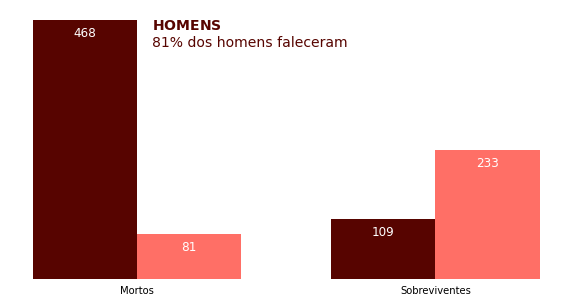

In [156]:
male_died = train.loc[(train.Sex == 'male') & (train.Survived == 0)].shape[0]
female_died = train.loc[(train.Sex == 'female') & (train.Survived == 0)].shape[0]

labels1 = ['Mortos', 'Sobreviventes'] 
data_male = [int(male_died), int(male_survived)]
data_female = [female_died, female_survived]

x1 = np.arange(len(labels1))
width_bar = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

chart = ax.bar(x1 - width_bar/2, data_male, width_bar, color=vermelho, align='center')
chart1 = ax.bar(x1 + width_bar/2, data_female, width_bar, color=vermelho1, align='center')


#remover bordas
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# # remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True)

#remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2,  height),
                    xytext=(0, -20),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color="white",
                    )

plt.text(0.05, 420, '$\\bf{HOMENS}$\n''81% dos homens faleceram', fontsize=14, color=vermelho)
        
# plotar labels dentro das barras
autolabel(chart)
autolabel(chart1)

#adicionar labels
ax.set_xticks(x1)
ax.set_xticklabels(labels1)


plt.show()


De acordo com as informações apresentadas acima, 74% das mulheres sobreviveram, um valor muito superior ao dos homens que foi de 18%. Embora, o número homens a bordo do návio era superior ao das mulheres, uma diferença de 263 homens.

**Q4.Qual o percentual de crianças/adolescentes que sobreviveram por classe?**

Para esta análise foi considerado as crianças/adolescentes de 0 a 16 anos.

In [113]:
kid_survived = train.loc[(train.Age < 16) & (train.Survived == 1)]['Pclass']
kid_died = train.loc[(train.Age < 16) & (train.Survived == 0)]['Pclass']

def percentual(survived, died, n_class):
  list_survived = []
  list_died = []
  survived_aux = 0
  died_aux = 0

  for x in survived:
    if x == n_class:
      list_survived.append(x)
      survived_aux = len(list_survived)

  for c in died:
    if c == n_class:
      list_died.append(c)
      died_aux = len(list_died)

  percent = 100 - ((died_aux / (died_aux + survived_aux)) * 100)
  quantity_class = died_aux + survived_aux
  
  return percent, quantity_class 

print(f'Quantidade de crianças da 1ª Classe: {(percentual(kid_survived, kid_died, 1)[1])}')
print(f'Percentual de crianças/adolescentes que sobreviveram na 1ª classe: {(percentual(kid_survived, kid_died, 1)[0]):.0f}%\n')

print(f'Quantidade de crianças da 2ª Classe: {(percentual(kid_survived, kid_died, 2)[1])}')
print(f'Percentual de crianças/adolescentes que sobreviveram na 2ª classe: {(percentual(kid_survived, kid_died, 2)[0]):.0f}%\n')

print(f'Quantidade de crianças da 3ª Classe: {(percentual(kid_survived, kid_died, 3)[1])}')
print(f'Percentual de crianças/adolescentes que sobreviveram na 3ª classe: {(percentual(kid_survived, kid_died, 3)[0]):.0f}%')


Quantidade de crianças da 1ª Classe: 6
Percentual de crianças/adolescentes que sobreviveram na 1ª classe: 83%

Quantidade de crianças da 2ª Classe: 19
Percentual de crianças/adolescentes que sobreviveram na 2ª classe: 100%

Quantidade de crianças da 3ª Classe: 58
Percentual de crianças/adolescentes que sobreviveram na 3ª classe: 43%


In [114]:
value_class1 = int((percentual(kid_survived, kid_died, 1)[0]))
value_class2 = int((percentual(kid_survived, kid_died, 2)[0]))
value_class3 = int((percentual(kid_survived, kid_died, 3)[0]))

labels2 = ['1ª Classe', '2ª Classe', '3ª Classe']
values2 = [value_class1, value_class2, value_class3]

x2 = np.arange(len(labels2))
width_bar2 = 0.55

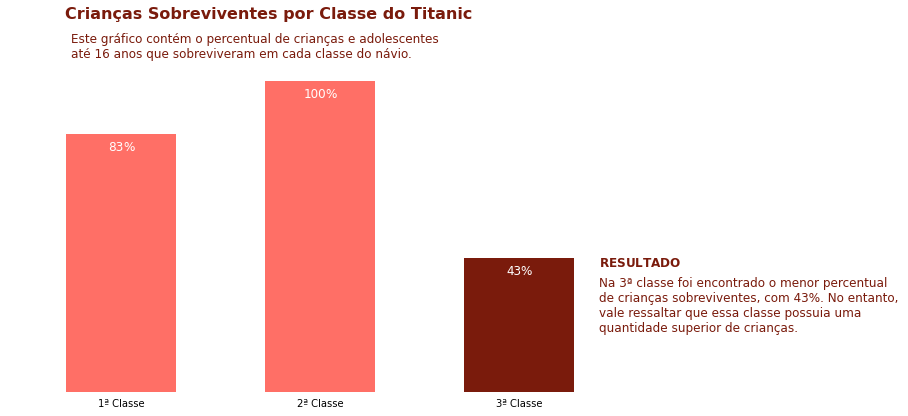

In [172]:
fig, ax = plt.subplots(figsize= (10,6))

bars_crianca_sob = ax.bar(x2 - width_bar2/2, values2, width_bar2, label='Antes', color=cores, align='edge')

#adicionar labels
ax.set_xticks(x2)
ax.set_xticklabels(labels2)

#remover grid
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# # remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True)


#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2.2,  height),
                    xytext=(0, -20),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color="white",
                    )
        
# plotar labels dentro das barras
autolabel(bars_crianca_sob)

# plotar título
plt.text(-0.28, 120, 'Crianças Sobreviventes por Classe do Titanic',
         fontsize=16, 
         color=vermelho3,
         weight='bold')

ax.annotate("Este gráfico contém o percentual de crianças e adolescentes\n"
            "até 16 anos que sobreviveram em cada classe do návio.",
            xy=(.078, .920), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12,
            color=vermelho3)

# plotar título
plt.text(0.009, 77.455, '%',
         fontsize=12, 
         color='#FFFFFF')
# plotar título
plt.text(1.026, 94.480, '%',
         fontsize=12, 
         color='white')
# plotar título
plt.text(2.009, 37.570, '%',
         fontsize=12, 
         color='white')

plt.text(2.4, 43.5,
         "$\\bf{RESULTADO}$\n",
         verticalalignment="top",
         fontsize=12,
         color=vermelho3)

plt.text(2.4, 37,
         "Na 3ª classe foi encontrado o menor percentual\n"
         "de crianças sobreviventes, com 43%. No entanto, \n"
         "vale ressaltar que essa classe possuia uma\n"
         "quantidade superior de crianças.\n"
         ,
         verticalalignment="top",
         fontsize=12,
         color=vermelho3)

plt.show()

De acordo com a situção de emergência, as crianças deveriam ser salvas primeiro, porém, os dados mostram que as crianças que estavam na 3ª classe tiveram chances menores de sobreviver a tragédia.

**Q5. Qual classe teve o maior número de sobreviventes?**

Será que algumas das classes teve maiores chances de sobrevivência?

In [116]:
people_survived2 = train.loc[(train.Survived == 1)]['Pclass']

def sobreviventes(people_died, all_people, n_classe):
  
  people = []
  people_survived = []
  people_aux = 0
  people_died_aux = 0
  
  for x in people_died:
    if x == n_classe:
      people_survived.append(x)
      people_died_aux = len(people_survived)
  
  
  for c in all_people:
    if c == n_classe:
      people.append(c)
      people_aux = len(people)
  

  percentual = (people_died_aux / people_aux) * 100
  
  return percentual

  #{(percentual(kid_survived, kid_died, 1)[0]):.0f}

print(f'Percentual de sobreviventes na 1ª classe: {(sobreviventes(people_survived2, train.Pclass, 1)):.0f}%\n')
print(f'Percentual de sobreviventes na 2ª classe: {(sobreviventes(people_survived2, train.Pclass, 2)):.0f}%\n')
print(f'Percentual de sobreviventes na 3ª classe: {(sobreviventes(people_survived2, train.Pclass, 3)):.0f}%\n')

Percentual de sobreviventes na 1ª classe: 63%

Percentual de sobreviventes na 2ª classe: 47%

Percentual de sobreviventes na 3ª classe: 24%



In [117]:
values_class1 = round(sobreviventes(people_survived2, train.Pclass, 1))
values_class2 = round(sobreviventes(people_survived2, train.Pclass, 2))
values_class3 = round(sobreviventes(people_survived2, train.Pclass, 3))

values_sobreviventes = [values_class1, values_class2, values_class3]

vermelho1, vermelho2, vermelho3 = '#FF6F66', '#ff9e81', '#7a1b0c'
cores = [vermelho2, vermelho1, vermelho3]
x1 = np.arange(len(labels2))
width_bar = 0.55

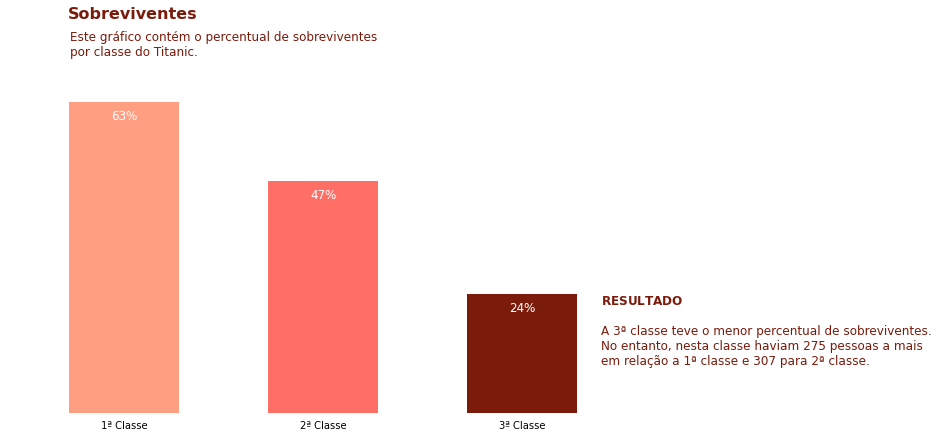

In [118]:
fig, ax = plt.subplots(figsize= (10,6))

bars_sobreviventes = ax.bar(x1 - width_bar/2, values_sobreviventes, width_bar, label='Antes', color=cores, align='edge')

#adicionar labels
x1 = np.arange(len(labels2))
ax.set_xticks(x1)
ax.set_xticklabels(labels2)

#remover grid
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#remover eixo y
plt.gca().axes.get_yaxis().set_visible(False)

# # remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,         
    labelbottom=True)


#criar função para dar labels automaticamente
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
                    '{}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2.2,  height),
                    xytext=(0, -20),  # offset
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=12,
                    color="white",
                    )
        
# plotar labels dentro das barras
autolabel(bars_sobreviventes)

# plotar título
plt.text(-0.28, 80, 'Sobreviventes',
         fontsize=16, 
         color=vermelho3,
         weight='bold')

ax.annotate("Este gráfico contém o percentual de sobreviventes\n"
            "por classe do Titanic.",
            xy=(.074, .930), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=12,
            color=vermelho3)

# plotar título
plt.text(0.009, 59.600, '%',
         fontsize=12, 
         color='white')
# plotar título
plt.text(1.009, 43.480, '%',
         fontsize=12, 
         color='white')
# plotar título
plt.text(2.009, 20.570, '%',
         fontsize=12, 
         color='white')

plt.text(2.4, 24,
         "$\\bf{RESULTADO}$\n",
         verticalalignment="top",
         fontsize=12,
         color=vermelho3)

plt.text(2.4, 18,
         "A 3ª classe teve o menor percentual de sobreviventes.\n"
         "No entanto, nesta classe haviam 275 pessoas a mais\n"
         "em relação a 1ª classe e 307 para 2ª classe.\n"
         ,
         verticalalignment="top",
         fontsize=12,
         color=vermelho3)

plt.show()

Analisando os dados, podemos confirmar a suposição de que uma classe teve mais chances de sobrevivência do que as demais. Mais da metade das pessoas que estavam na 1ª classe conseguiram escapar com vida da tragédia, visto que a classe se situava mais próxima do convés, lugar onde estavam os botes.



**Q6. Qual era a faxetária de idade dos sobreviventes do Titanic? A pessoa mais velha que estava na tragédia sobreviveu?**

Neste tópico irei abordar informações relacionadas as idades de pessoas que falareceram e também das que sobreviveram. 

Além disso, julguei interessante em saber se a pessoa mais velha que estava abordo do Titanic sobreviveu ou não.

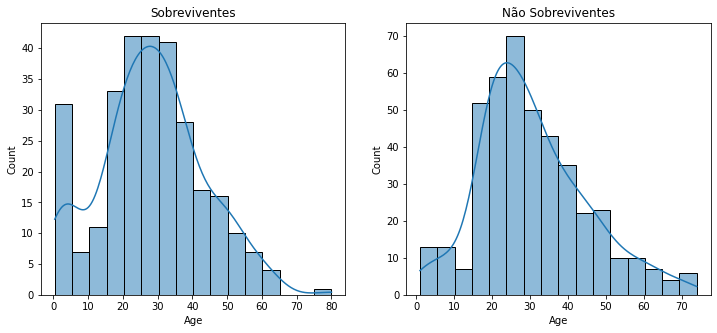

In [157]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize=(12,5))

age_survived = train.loc[(train.Survived == 1)].copy()
age_died = train.loc[(train.Survived == 0)].copy()

sns.histplot(data=age_survived, x="Age", kde=True, ax=ax[0])
sns.histplot(data=age_died, x="Age", kde=True, ax=ax[1])

ax[0].set_title('Sobreviventes')
ax[1].set_title('Não Sobreviventes')

plt.show()

Analisando os gráficos acima, nota-se que as faxetárias de idades estão entre 18 e 38 anos. Um ponto importante no gráfico de sobreviventes é o pico em idades de 0-5 anos, que confirma a hipótese de que as crianças e as mulheres foram salvas primeiro.


In [169]:
print(f'Idade da pessoa mais velha: {train.Age.max()}')
train.loc[(train.Age == 80)]

Idade da pessoa mais velha: 80.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


Mr. Algernon Henry Wilson, foi a pessoa mais velha a bordo do Naufrágio do Titanic e um dos sobreviventes da tragédia. De acordo com a distribuição de idade dos sobreviventes, Mr. Algernon pode ser considerado um outlier entre as pessoas que sobreviveram a tragédia.

[Neste link]((https://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html)) é possível saber um pouco mais sobre a vida dele.